### regression model to show association between microbes(dependent variables) at genus level and environmental factors(independent variables), input files generated in the script called (makeInputFilesForLinearModel.ipynb)

In [1]:
#load packages
import os as os
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm1
from scipy import stats
%matplotlib inline


In [7]:
#setworking directory to AbioticAraMicrobe/
os.chdir("../")


                              env      coef   std err       t    P_t  \
7   Palmer_Drought_Severity_Index   -0.0001  0.000049  -2.064  0.039   
15                     Wind_Speed -0.000092  0.000045  -2.051  0.041   
1                           const    0.0001  0.000017   7.782    0.0   
1                           const    0.0019       0.0  15.937    0.0   
2       Actual_Evapotranspiration    0.0018     0.001   2.169   0.03   

   Int_0.025 Int_0.975                          microbes  
7       -0.0 -0.000005  X.Eubacterium._fissicatena_group  
15      -0.0 -0.000004  X.Eubacterium._fissicatena_group  
1   0.000099       0.0                       X01D2Z36_ge  
1      0.002     0.002                     X0319.6G20_ge  
2        0.0     0.003                     X0319.6G20_ge  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 7 to 1
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   env        2372 non-null 

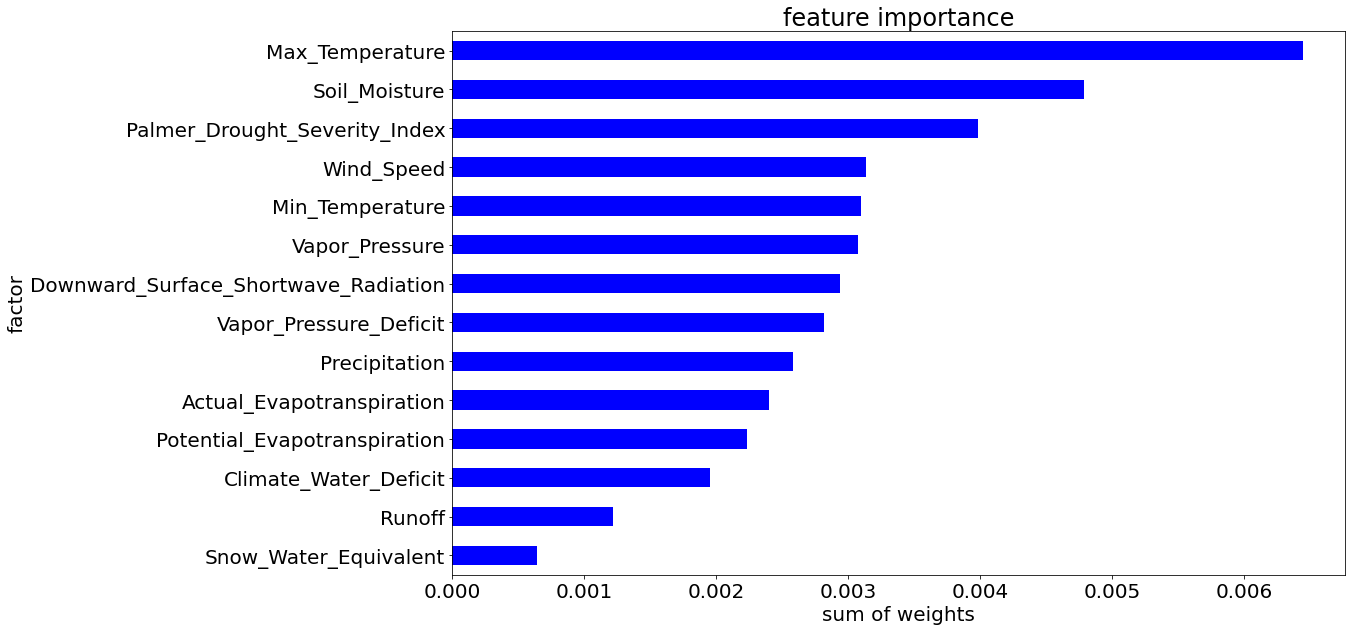

In [27]:
#Bacteria 
df = pd.read_csv('data/linearModel/B_GenusRa.txt' , sep="\t" , index_col=0 , header=0  , encoding="utf-8")
df.head()
#list(df.columns)
df.columns.get_loc('Wind_Speed') #till here is metadata columns

y = df.iloc[:,14:] #microbes as a dependent variables
X = df.iloc[:,:14] #env data as a predictior of microbes
X.head()

pval = pd.DataFrame()
X2 = sm1.add_constant(X) #add constant value=1 to dataframe
for i in range(len(y.columns)): #  range of number of microbes
    est = sm1.OLS(y.iloc[:,i], X2) # for each microbe make a model to see how all the environmental factors are related to that microbe
    est2 = est.fit() #fit the model
    res = pd.DataFrame(est2.summary().tables[1]) #take summary of the model's result
    res.columns = ["env" , "coef","std err","t","P_t","Int_0.025" , "Int_0.975" ] #give column name to result
    res = res.iloc[1: , :]
    res.iloc[:,1:7] =res.iloc[:,1:7].astype(str, errors = 'raise')
    res.iloc[:,1:7] =res.iloc[:,1:7].astype(float, errors = 'raise')
    res["microbes"] = y.columns[i] # add name of the microbe to result
    pval = pd.concat([ pval,res]) #keep the result in pval variable


#select significant pvalues
pval1 = pd.DataFrame(pval[pval["P_t"]< 0.05])
print(pval1.head())
#convert columns to float
for col in range(1,7):
    pval1.iloc[:,col] = pval1.iloc[:,col].astype('float' , errors = 'raise')
pval1.iloc[:,0] = pval1.iloc[:,0].astype('str' , errors = 'raise')
pval1.info()

#add a new column to keep absolute values of model's coefficient
pval1["abs_coef"] = pval1["coef"].abs()
pval1["m_env"] = pval1["microbes"] + "_" + pval1["env"] #add a new column (microbe_environmentalfactor)
B_pval = pval.copy() 
B_pval["taxa"] = "Bacteria"

df = pd.DataFrame(pval1.groupby(['env'])['abs_coef'].mean() , columns=["abs_coef"]) #avarage of coefficient values per environmental factor
df.drop("const",axis=0,inplace=True) # drop 'const' from the rows

#plot avarage of absolute coefficient values of environmental factors from all the microbes
df.sort_values("abs_coef" , ascending=True , inplace=True) 
df["abs_coef"].plot.barh(figsize=(16,10) , color = "blue")
plt.title('feature importance')
plt.ylabel('factor')
plt.xlabel('sum of weights')
plt.rcParams.update({'font.size':20})
#plt.savefig("plots/B_Mean_coefSignificants.pdf" , bbox_inches='tight')
plt.show()

                         env      coef  std err      t    P_t Int_0.025  \
1                      const    0.0044    0.002  2.351  0.019     0.001   
1                      const    0.0013      0.0  3.839    0.0     0.001   
1                      const  0.000064  0.00002  3.181  0.002  0.000024   
2  Actual_Evapotranspiration    0.0005      0.0  3.394  0.001       0.0   
5            Max_Temperature   -0.0009      0.0 -3.224  0.001    -0.001   

  Int_0.975                             microbes  
1     0.008       c__Agaricomycetes_unclassified  
1     0.002  c__Cystobasidiomycetes_unclassified  
1       0.0       c__Eurotiomycetes_unclassified  
2     0.001       c__Eurotiomycetes_unclassified  
5      -0.0       c__Eurotiomycetes_unclassified  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 1 to 1
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   env        1241 non-null   object 
 1   coef       1241

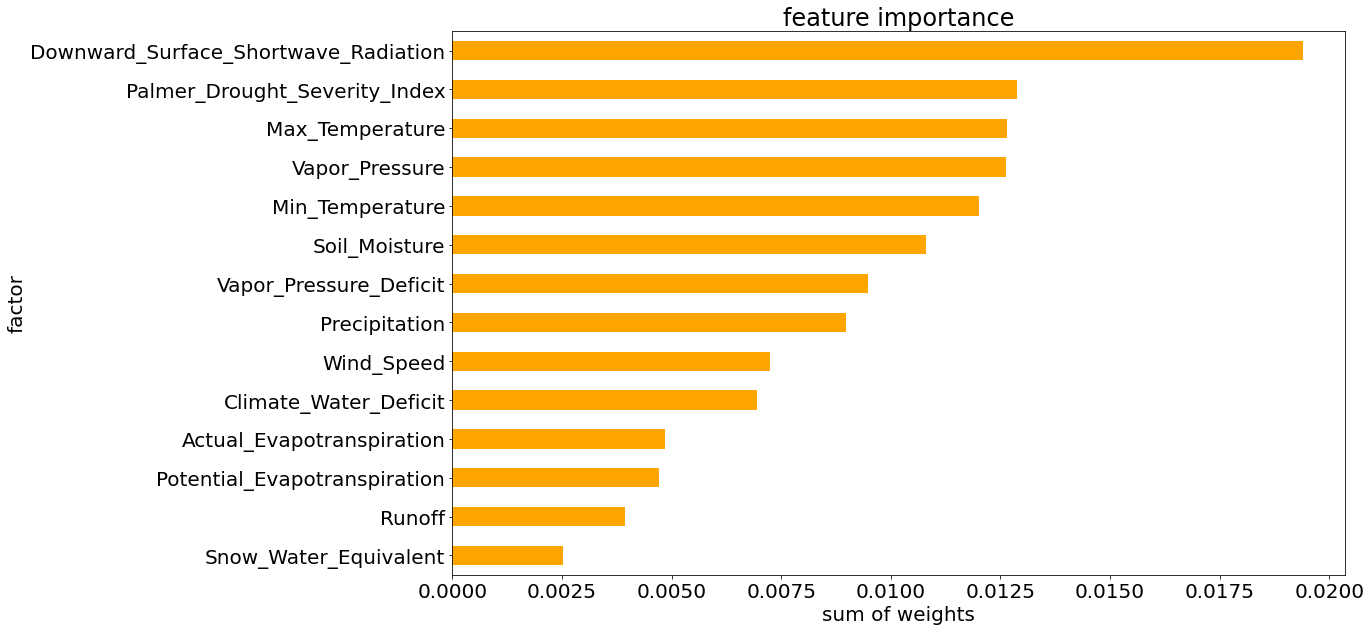

In [29]:
#Fungi
df = pd.read_csv('data/linearModel/F_GenusRa.txt' , sep="\t" , index_col=0 , header=0  , encoding="utf-8")
df.head()
#list(df.columns)
df.columns.get_loc('Wind_Speed') #till here is metadata columns

y = df.iloc[:,14:] #microbes as a dependent variables
X = df.iloc[:,:14] #env data as a predictior of microbes
X.head()

pval = pd.DataFrame()
X2 = sm1.add_constant(X) #add constant value=1 to dataframe
for i in range(len(y.columns)): #  range of number of microbes
    est = sm1.OLS(y.iloc[:,i], X2) # for each microbe make a model to see how all the environmental factors are related to that microbe
    est2 = est.fit() #fit the model
    res = pd.DataFrame(est2.summary().tables[1]) #take summary of the model's result
    res.columns = ["env" , "coef","std err","t","P_t","Int_0.025" , "Int_0.975" ] #give column name to result
    res = res.iloc[1: , :]
    res.iloc[:,1:7] =res.iloc[:,1:7].astype(str, errors = 'raise')
    res.iloc[:,1:7] =res.iloc[:,1:7].astype(float, errors = 'raise')
    res["microbes"] = y.columns[i] # add name of the microbe to result
    pval = pd.concat([ pval,res]) #keep the result in pval variable


#select significant pvalues
pval1 = pd.DataFrame(pval[pval["P_t"]< 0.05])
print(pval1.head())
#convert columns to float
for col in range(1,7):
    pval1.iloc[:,col] = pval1.iloc[:,col].astype('float' , errors = 'raise')
pval1.iloc[:,0] = pval1.iloc[:,0].astype('str' , errors = 'raise')
pval1.info()

#add a new column to keep absolute values of model's coefficient
pval1["abs_coef"] = pval1["coef"].abs()
pval1["m_env"] = pval1["microbes"] + "_" + pval1["env"] #add a new column (microbe_environmentalfactor)
F_pval = pval.copy() 
F_pval["taxa"] = "Fungi"

df = pd.DataFrame(pval1.groupby(['env'])['abs_coef'].mean() , columns=["abs_coef"]) #avarage of coefficient values per environmental factor
df.drop("const",axis=0,inplace=True) # drop 'const' from the rows

#plot avarage of absolute coefficient values of environmental factors from all the microbes
df.sort_values("abs_coef" , ascending=True , inplace=True) 
df["abs_coef"].plot.barh(figsize=(16,10) , color = "orange")
plt.title('feature importance')
plt.ylabel('factor')
plt.xlabel('sum of weights')
plt.rcParams.update({'font.size':20})
#plt.savefig("plots/F_Mean_coefSignificants.pdf" , bbox_inches='tight')
plt.show()

                              env    coef   std err      t    P_t Int_0.025  \
1                           const  0.0001  0.000028   3.56    0.0  0.000045   
7   Palmer_Drought_Severity_Index -0.0004       0.0 -2.032  0.043    -0.001   
9                   Precipitation -0.0004       0.0 -2.297  0.022    -0.001   
10                         Runoff  0.0002  0.000092  2.215  0.027  0.000023   
11          Snow_Water_Equivalent  0.0001  0.000068  2.076  0.038  0.000008   

   Int_0.975      microbes  
1        0.0  Acanthamoeba  
7  -0.000015  Acanthamoeba  
9  -0.000056  Acanthamoeba  
10       0.0  Acanthamoeba  
11       0.0  Acanthamoeba  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 1 to 13
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   env        695 non-null    object 
 1   coef       695 non-null    float64
 2   std err    695 non-null    float64
 3   t          695 non-null    float64
 4   P_t

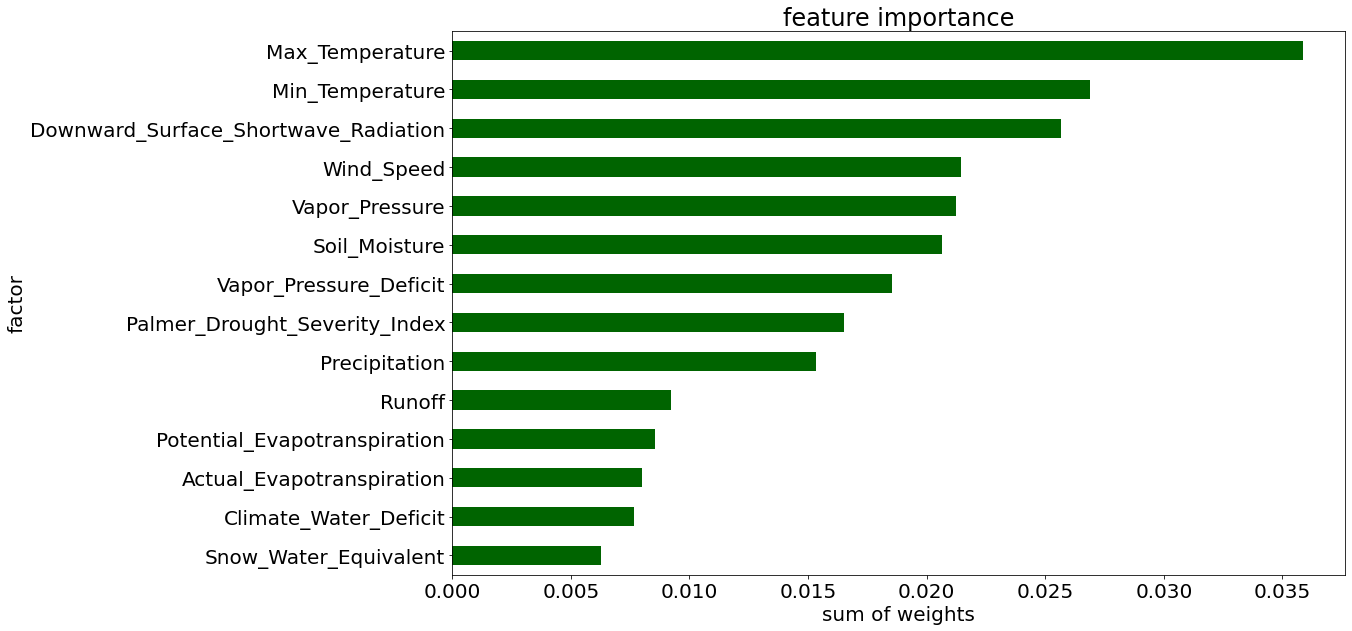

In [30]:
#Eukaryote
df = pd.read_csv('data/linearModel/O_GenusRa.txt' , sep="\t" , index_col=0 , header=0  , encoding="utf-8")
df.head()
#list(df.columns)
df.columns.get_loc('Wind_Speed') #till here is metadata columns

y = df.iloc[:,14:] #microbes as a dependent variables
X = df.iloc[:,:14] #env data as a predictior of microbes
X.head()

pval = pd.DataFrame()
X2 = sm1.add_constant(X) #add constant value=1 to dataframe
for i in range(len(y.columns)): #  range of number of microbes
    est = sm1.OLS(y.iloc[:,i], X2) # for each microbe make a model to see how all the environmental factors are related to that microbe
    est2 = est.fit() #fit the model
    res = pd.DataFrame(est2.summary().tables[1]) #take summary of the model's result
    res.columns = ["env" , "coef","std err","t","P_t","Int_0.025" , "Int_0.975" ] #give column name to result
    res = res.iloc[1: , :]
    res.iloc[:,1:7] =res.iloc[:,1:7].astype(str, errors = 'raise')
    res.iloc[:,1:7] =res.iloc[:,1:7].astype(float, errors = 'raise')
    res["microbes"] = y.columns[i] # add name of the microbe to result
    pval = pd.concat([ pval,res]) #keep the result in pval variable


#select significant pvalues
pval1 = pd.DataFrame(pval[pval["P_t"]< 0.05])
print(pval1.head())
#convert columns to float
for col in range(1,7):
    pval1.iloc[:,col] = pval1.iloc[:,col].astype('float' , errors = 'raise')
pval1.iloc[:,0] = pval1.iloc[:,0].astype('str' , errors = 'raise')
pval1.info()

#add a new column to keep absolute values of model's coefficient
pval1["abs_coef"] = pval1["coef"].abs()
pval1["m_env"] = pval1["microbes"] + "_" + pval1["env"] #add a new column (microbe_environmentalfactor)
E_pval = pval.copy() 
E_pval["taxa"] = "Eukaryotes"

df = pd.DataFrame(pval1.groupby(['env'])['abs_coef'].mean() , columns=["abs_coef"]) #avarage of coefficient values per environmental factor
df.drop("const",axis=0,inplace=True) # drop 'const' from the rows

#plot avarage of absolute coefficient values of environmental factors from all the microbes
df.sort_values("abs_coef" , ascending=True , inplace=True) 
df["abs_coef"].plot.barh(figsize=(16,10) , color = "darkgreen")
plt.title('feature importance')
plt.ylabel('factor')
plt.xlabel('sum of weights')
plt.rcParams.update({'font.size':20})
#plt.savefig("plots/F_Mean_coefSignificants.pdf" , bbox_inches='tight')
plt.show()

In [31]:
#save the output files of the model 

all_pval = pd.concat([B_pval ,F_pval , E_pval])
all_pval.tail()

all_pval.to_csv("data/linearModel/linermodelresult.csv")

#### Result of the model further visualized in the makeInputFilesForLinearModel.ipynb script.
